In [1]:
_year='2021'

In [2]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여소별 이용정보(시간대별)\\'
filename = '서울특별시 공공자전거 대여소별 이용정보(시간대별)_' + _year + '.parquet'
start_time = time.time()
df_2024 = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_2024.head(5)

read_parquet time : 6.914001703262329


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.90,0.23,992.78,13.0
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.50,10.0
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.00,0.00,0.00,7.0
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0


In [3]:
# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er

In [4]:
import ExcelFile_EDA as ee
ee.ss_isnull(df_2024)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여일자,25421727,0,0.000000
1,대여시간,25421727,0,0.000000
2,대여소번호,25421727,0,0.000000
3,대여소명,25421727,0,0.000000
4,대여구분코드,25421727,0,0.000000
5,성별,14657620,10764107,42.342155
6,연령대코드,25421727,0,0.000000
7,이용건수,25421727,0,0.000000
8,운동량,25273392,148335,0.583497
9,탄소량,25273392,148335,0.583497


In [5]:
df_2024.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.90,0.23,992.78,13.0
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.50,10.0
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.00,0.00,0.00,7.0
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0


In [6]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421727 entries, 0 to 25421726
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     float64
 8   운동량      float64
 9   탄소량      float64
 10  이동거리(M)  float64
 11  이용시간(분)  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 2.3+ GB


In [7]:
pd.options.display.float_format = '{:3}'.format

In [8]:
df_2024.shape

(25421727, 12)

In [9]:
df_2024.isnull().sum()

대여일자              0
대여시간              0
대여소번호             0
대여소명              0
대여구분코드            0
성별         10764107
연령대코드             0
이용건수              0
운동량          148335
탄소량          148335
이동거리(M)           0
이용시간(분)           0
dtype: int64

In [10]:
df_2024['대여시간'].value_counts()

대여시간
18    2434768
17    2039193
19    1797231
16    1636612
20    1548668
8     1546828
21    1456276
15    1417783
14    1293876
13    1230384
22    1225879
12    1198500
11    1071671
9     1034646
7      995474
10     904878
23     681792
0      489233
6      428093
1      321509
2      208966
5      197326
3      142570
4      119571
Name: count, dtype: int64

## 1. 가설 1) 따릉이 최다 사용량이 출퇴근 시간이고 

### - 최다 사용량이 출퇴근 시간인 것을 확인한다.  

- 대여일자 컬럼을 datetime 형식으로 변환

In [14]:
df_2024['대여일자'] = pd.to_datetime(df_2024['대여일자'], format='%Y-%m-%d')
# df_2020['대여시간'].astype('datetime64[ns]')

In [15]:
print(df_2024['대여일자'].dtype)

datetime64[ns]


In [16]:
df_2024.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0


- datetime 형식으로 변경된 '대여일자' 컬럼에서 요일을 추출하여 새로운 컬럼으로 저장

In [18]:
# dt.weekday : 요일 정보를 숫자로 추출 
# 0 : 월요일, 1 : 화요일, .... 6 : 일요일
df_2024['요일_인덱스'] = df_2024['대여일자'].dt.weekday

In [19]:
df_2024.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0,4
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0,4
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0,4
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0,4
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0,4


In [20]:
# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

# apply 함수로 숫자 -> 요일 이름으로 변환
df_2024['요일'] = df_2024.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

In [21]:
df_2024.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0,4,금
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0,4,금
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0,4,금
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0,4,금
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0,4,금


In [22]:
df_2024[['요일', '대여시간']].value_counts(ascending=False)

요일  대여시간
수   18      437524
금   18      410733
목   18      400182
월   18      373544
화   18      349759
             ...  
수   4        16976
화   4        15889
일   4        15438
월   4        15394
    3        14745
Name: count, Length: 168, dtype: int64

In [23]:
grounded = df_2024.groupby(['요일', '대여시간'])['이용건수'].sum().unstack()
grounded

대여시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
요일,,,,,,,,,,,,,,,,,,,,,
금,76432.0,49092.0,30882.0,21042.0,17720.0,31243.0,73080.0,190225.0,313082.0,170893.0,...,191490.0,216848.0,270550.0,384582.0,496019.0,332553.0,275113.0,265809.0,233992.0,129470.0
목,81127.0,51301.0,32471.0,22241.0,18909.0,34641.0,82917.0,216237.0,354935.0,187598.0,...,187387.0,206587.0,253156.0,361916.0,489828.0,326258.0,274692.0,260157.0,217759.0,111912.0
수,65358.0,44254.0,28834.0,19927.0,17338.0,31504.0,75085.0,191735.0,325703.0,176905.0,...,204088.0,230430.0,277825.0,395994.0,537258.0,363874.0,302148.0,281684.0,233102.0,115903.0
월,58257.0,35783.0,22231.0,15251.0,15704.0,31223.0,72446.0,187495.0,304330.0,166408.0,...,173100.0,192461.0,232403.0,325631.0,457947.0,307960.0,256708.0,237344.0,194344.0,98690.0
일,80956.0,52278.0,34917.0,22907.0,15980.0,17410.0,28170.0,47823.0,78622.0,107857.0,...,266703.0,297153.0,311816.0,307449.0,281275.0,236514.0,214596.0,197404.0,153007.0,86827.0
토,97039.0,65024.0,42604.0,28012.0,20682.0,24390.0,38069.0,65347.0,113813.0,142745.0,...,235266.0,252890.0,267685.0,271800.0,255405.0,225166.0,214907.0,216062.0,188120.0,111866.0
화,66010.0,41943.0,26775.0,18341.0,16219.0,31129.0,74078.0,186996.0,306526.0,161643.0,...,165505.0,182134.0,226185.0,318526.0,425629.0,285250.0,238016.0,223393.0,186830.0,93596.0


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

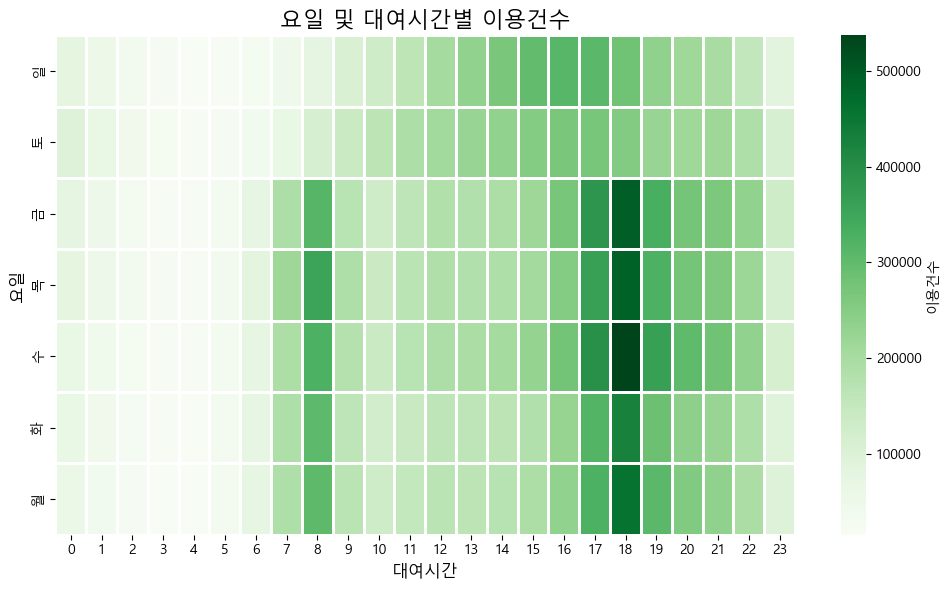

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요일 순서 정의
day_order = ['일', '토', '금', '목', '수', '화', '월']

# 데이터프레임 재정렬
grounded_sorted = grounded.reindex(day_order)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(grounded_sorted, annot=False, cmap='Greens', cbar_kws={'label': '이용건수'}, linewidths=1)

# 제목 및 축 레이블 설정
plt.title('요일 및 대여시간별 이용건수', fontsize=16)
plt.xlabel('대여시간', fontsize=12)
plt.ylabel('요일', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()

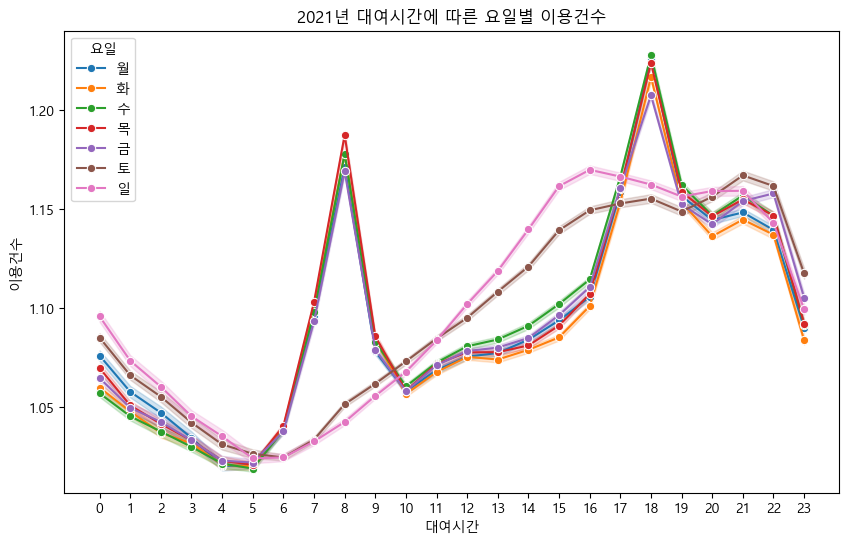

In [27]:

# 요일 순서 정의
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

plt.figure(figsize=(10,6))
sns.lineplot(x='대여시간', y='이용건수', hue='요일', data=df_2024, marker='o', hue_order=weekday_order)
plt.title(_year + '년 대여시간에 따른 요일별 이용건수')
plt.xticks(range(0,24))
plt.xlabel('대여시간')
plt.ylabel('이용건수')
plt.show()

## 2. 가설 2) 출퇴근 시간에 따릉이 대여량이 최다인 대여소는 지하철역 인근 대여소일 것이다.

### - 출퇴근 시간 대여소별 사용량 확인

- 요일 : 월~금요일 추출한다.

In [31]:
df_2024.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0,4,금
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0,4,금
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0,4,금
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0,4,금
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0,4,금


In [32]:
df_2024.count()

대여일자       25421727
대여시간       25421727
대여소번호      25421727
대여소명       25421727
대여구분코드     25421727
성별         14657620
연령대코드      25421727
이용건수       25421727
운동량        25273392
탄소량        25273392
이동거리(M)    25421727
이용시간(분)    25421727
요일_인덱스     25421727
요일         25421727
dtype: int64

In [33]:
df_2024_day = df_2024[~(df_2024['요일'].isin(['토', '일']))]
df_2024_day

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0,4,금
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0,4,금
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0,4,금
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0,4,금
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25421722,2021-12-31,23,4561,4561. 양평역 1번출구,정기권,M,50대,1.0,22.95,0.19,840.0,4.0,4,금
25421723,2021-12-31,23,815,815. LIG강촌아파트 103동앞,정기권,M,50대,1.0,30.2,0.21,907.98,8.0,4,금
25421724,2021-12-31,23,2173,2173. 당곡사거리,정기권,M,60대,1.0,64.55,0.48,2063.26,13.0,4,금
25421725,2021-12-31,23,2718,2718.마곡수명산파크1단지,정기권,M,60대,1.0,27.84,0.22,950.0,8.0,4,금


- '출퇴근' 컬럼을 새로 만들어서 출근, 퇴근을 넣어준다. (월~금요일, 출퇴근)

In [35]:
df_2024_day.loc[df_2024_day['대여시간'].isin([7,8]),'출퇴근'] = '출근'
df_2024_day.loc[df_2024_day['대여시간'].isin([17,18]),'출퇴근'] = '퇴근'

C:\Users\user\AppData\Local\Temp\ipykernel_10260\2796379095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_day.loc[df_2024_day['대여시간'].isin([7,8]),'출퇴근'] = '출근'


In [36]:
df_2024_day

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,None,~10대,2.0,28.9,0.23,992.78,13.0,4,금,NaN
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,None,~10대,1.0,34.38,0.26,1127.5,10.0,4,금,NaN
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,None,~10대,1.0,0.0,0.0,0.0,7.0,4,금,NaN
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,None,~10대,1.0,38.75,0.38,1658.34,14.0,4,금,NaN
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,None,~10대,1.0,12.96,0.17,743.88,5.0,4,금,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25421722,2021-12-31,23,4561,4561. 양평역 1번출구,정기권,M,50대,1.0,22.95,0.19,840.0,4.0,4,금,NaN
25421723,2021-12-31,23,815,815. LIG강촌아파트 103동앞,정기권,M,50대,1.0,30.2,0.21,907.98,8.0,4,금,NaN
25421724,2021-12-31,23,2173,2173. 당곡사거리,정기권,M,60대,1.0,64.55,0.48,2063.26,13.0,4,금,NaN
25421725,2021-12-31,23,2718,2718.마곡수명산파크1단지,정기권,M,60대,1.0,27.84,0.22,950.0,8.0,4,금,NaN


In [37]:
df_2024_day[df_2024_day['출퇴근'] == '출근'] # df_parquet[df_parquet['이용건수'] == '\\N']

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
1679,2021-01-01,7,1528,1528. 삼각산동 주민센터,정기권,None,~10대,1.0,315.0,2.84,12237.81,90.0,4,금,출근
1680,2021-01-01,7,1667,1667. 중계중학교,정기권,None,~10대,1.0,0.0,0.0,0.0,15.0,4,금,출근
1681,2021-01-01,7,1375,1375. 생명의 전화 종합복지관 앞 교차로,정기권,None,~10대,1.0,11.3,0.11,475.54,5.0,4,금,출근
1682,2021-01-01,7,782,782.서남병원 후문,정기권,None,~10대,1.0,103.38,1.06,4580.14,48.0,4,금,출근
1683,2021-01-01,7,1573,1573.현대성우아파트 옆,정기권,None,~10대,1.0,0.0,0.0,0.0,3.0,4,금,출근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25393863,2021-12-31,8,207,207. 여의나루역 1번출구 앞,정기권,M,60대,1.0,34.93,0.29,1260.0,8.0,4,금,출근
25393864,2021-12-31,8,3518,3518. 군자역 7번출구뒤,정기권,M,70대~,1.0,55.99,0.47,2020.0,9.0,4,금,출근
25393865,2021-12-31,8,1048,1048. 동부기업(둔촌동),정기권,M,70대~,1.0,21.34,0.18,770.0,4.0,4,금,출근
25393866,2021-12-31,8,2431,2431.대치역 7번출구,정기권,M,70대~,2.0,112.59,1.01,4388.14,102.0,4,금,출근


In [38]:
df_2024_day[df_2024_day['출퇴근'] == '퇴근']

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
12890,2021-01-01,17,1723,1723. 방학동학마을도서관,정기권,None,~10대,1.0,309.09,3.18,13693.53,56.0,4,금,퇴근
12891,2021-01-01,17,1451,1451. 중랑세무서,정기권,None,~10대,1.0,63.32,0.57,2460.0,14.0,4,금,퇴근
12892,2021-01-01,17,962,962. 은평뉴타운 힐데스하임,정기권,None,~10대,1.0,47.05,0.37,1584.07,12.0,4,금,퇴근
12893,2021-01-01,17,2613,2613. 잠실나들목,정기권,None,~10대,1.0,0.0,0.0,0.0,33.0,4,금,퇴근
12894,2021-01-01,17,2702,2702. 마곡 엠밸리2단지,정기권,None,~10대,1.0,73.51,0.54,2320.37,27.0,4,금,퇴근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25415921,2021-12-31,18,3680,3680. 강동역3번출구,정기권,M,60대,1.0,68.47,0.63,2701.52,51.0,4,금,퇴근
25415922,2021-12-31,18,194,194. 증산교 앞,정기권,M,60대,1.0,372.91,2.77,11920.0,80.0,4,금,퇴근
25415923,2021-12-31,18,201,201. 진미파라곤 앞,정기권,M,60대,1.0,13.87,0.11,460.72,115.0,4,금,퇴근
25415924,2021-12-31,18,913,913. 이마트 은평점,정기권,M,60대,1.0,15.63,0.14,607.12,5.0,4,금,퇴근


In [39]:
df_2024_day['출퇴근'].unique()

array([nan, '출근', '퇴근'], dtype=object)

In [40]:
df_2024_day['출퇴근'].value_counts()

출퇴근
퇴근    3511613
출근    2249069
Name: count, dtype: int64

In [41]:
df_2024_day.count()

대여일자       18979008
대여시간       18979008
대여소번호      18979008
대여소명       18979008
대여구분코드     18979008
성별         10945626
연령대코드      18979008
이용건수       18979008
운동량        18865390
탄소량        18865390
이동거리(M)    18979008
이용시간(분)    18979008
요일_인덱스     18979008
요일         18979008
출퇴근         5760682
dtype: int64

In [42]:
df_2024_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18979008 entries, 0 to 25421726
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     float64       
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  float64       
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(6)
memory usage: 2.2+ GB


In [43]:
df_2024_day.loc[:, '이용건수'] = df_2024_day['이용건수'].astype(int)

In [44]:
df_2024_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18979008 entries, 0 to 25421726
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     float64       
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  float64       
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(6)
memory usage: 2.2+ GB


In [45]:
df_2024_time = df_2024_day[~df_2024_day['출퇴근'].isnull()] # df_2020_day.dropna(subset=['출퇴근'])

In [46]:
df_2024_time

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
1679,2021-01-01,7,1528,1528. 삼각산동 주민센터,정기권,None,~10대,1.0,315.0,2.84,12237.81,90.0,4,금,출근
1680,2021-01-01,7,1667,1667. 중계중학교,정기권,None,~10대,1.0,0.0,0.0,0.0,15.0,4,금,출근
1681,2021-01-01,7,1375,1375. 생명의 전화 종합복지관 앞 교차로,정기권,None,~10대,1.0,11.3,0.11,475.54,5.0,4,금,출근
1682,2021-01-01,7,782,782.서남병원 후문,정기권,None,~10대,1.0,103.38,1.06,4580.14,48.0,4,금,출근
1683,2021-01-01,7,1573,1573.현대성우아파트 옆,정기권,None,~10대,1.0,0.0,0.0,0.0,3.0,4,금,출근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25415921,2021-12-31,18,3680,3680. 강동역3번출구,정기권,M,60대,1.0,68.47,0.63,2701.52,51.0,4,금,퇴근
25415922,2021-12-31,18,194,194. 증산교 앞,정기권,M,60대,1.0,372.91,2.77,11920.0,80.0,4,금,퇴근
25415923,2021-12-31,18,201,201. 진미파라곤 앞,정기권,M,60대,1.0,13.87,0.11,460.72,115.0,4,금,퇴근
25415924,2021-12-31,18,913,913. 이마트 은평점,정기권,M,60대,1.0,15.63,0.14,607.12,5.0,4,금,퇴근


In [47]:
df_2024_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5760682 entries, 1679 to 25415925
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     float64       
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  float64       
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(6)
memory usage: 681.2+ MB


In [48]:
df_2024_time.count()

대여일자       5760682
대여시간       5760682
대여소번호      5760682
대여소명       5760682
대여구분코드     5760682
성별         3371138
연령대코드      5760682
이용건수       5760682
운동량        5723822
탄소량        5723822
이동거리(M)    5760682
이용시간(분)    5760682
요일_인덱스     5760682
요일         5760682
출퇴근        5760682
dtype: int64

In [49]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울시 공공자전거 대여소 정보\\'
filename = '공공자전거 대여소 정보_통합본_최종.parquet'
start_time = time.time()
df_st = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_st.head(5)

read_parquet time : 0.09962272644042969


,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.54613495,126.8210602,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.62862015,127.0669098,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.63815689,127.0732651,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.6588707,127.0719147,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [50]:
df_st.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.54613495,126.8210602,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.62862015,127.0669098,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.63815689,127.0732651,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.6588707,127.0719147,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [51]:
df_st.info() # 대여소번호 int / object 다름. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2960 non-null   object 
 1   대여소명    2960 non-null   object 
 2   자치구     2960 non-null   object 
 3   상세주소    2960 non-null   object 
 4   위도      2959 non-null   float64
 5   경도      2959 non-null   float64
 6   설치시기    2921 non-null   object 
 7   LCD     1517 non-null   float64
 8   QR      1752 non-null   float64
 9   운영방식    2921 non-null   object 
 10  데이터등록월  2921 non-null   object 
 11  대여소ID   2701 non-null   object 
 12  거치대수    39 non-null     float64
dtypes: float64(5), object(8)
memory usage: 300.8+ KB


In [52]:
df_st.shape

(2960, 13)

In [53]:
# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er

import ExcelFile_EDA as ee
ee.ss_isnull(df_st)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여소번호,2960,0,0.0
1,대여소명,2960,0,0.0
2,자치구,2960,0,0.0
3,상세주소,2960,0,0.0
4,위도,2959,1,0.033783783783783786
5,경도,2959,1,0.033783783783783786
6,설치시기,2921,39,1.3175675675675675
7,LCD,1517,1443,48.75
8,QR,1752,1208,40.81081081081081
9,운영방식,2921,39,1.3175675675675675


In [54]:
df_st_1 = df_st[['대여소번호', '대여소명', '자치구', '설치시기', '데이터등록월']]
df_st_1

,대여소번호,대여소명,자치구,설치시기,데이터등록월
0,06173,서울자동차운전전문학원,강서구,2024-03-18,2024-06
1,02902,공릉풍림아파트 108동,노원구,2020-03-24,2024-06
2,02912,대진고등학교,노원구,2020-03-23,2024-06
3,02911,상계역중앙시장,노원구,2020-03-23,2024-06
4,02910,도깨비시장,노원구,2020-03-25,2024-06
...,...,...,...,...,...
2955,05884,GS강서타워,영등포구,None,None
2956,05885,신정교하부(도림천역 방면),영등포구,None,None
2957,06060,신한은행 본점,중구,None,None
2958,06176,유광사 여성병원 앞,강서구,None,None


- 시간대별 데이터, 대여소정보 데이터 에서 '대여소번호' 컬럼의 숫자 표현방식, 데이터 타입이 다르다.

- 따라서, 1. 시간대별 데이터(월~금 / 출퇴근 시간대 추출함)의 '대여소번호' 컬럼의 숫자를 object로 바꾸어준다.
     ##### 2. 시간대별 데이터의 '대여소번호' 컬럼의 숫자를 00000 자리로 바꾸어준다. 

In [57]:
df_2024_time.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
1679,2021-01-01,7,1528,1528. 삼각산동 주민센터,정기권,None,~10대,1.0,315.0,2.84,12237.81,90.0,4,금,출근
1680,2021-01-01,7,1667,1667. 중계중학교,정기권,None,~10대,1.0,0.0,0.0,0.0,15.0,4,금,출근
1681,2021-01-01,7,1375,1375. 생명의 전화 종합복지관 앞 교차로,정기권,None,~10대,1.0,11.3,0.11,475.54,5.0,4,금,출근
1682,2021-01-01,7,782,782.서남병원 후문,정기권,None,~10대,1.0,103.38,1.06,4580.14,48.0,4,금,출근
1683,2021-01-01,7,1573,1573.현대성우아파트 옆,정기권,None,~10대,1.0,0.0,0.0,0.0,3.0,4,금,출근


In [58]:
df_2024_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5760682 entries, 1679 to 25415925
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     float64       
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  float64       
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(6)
memory usage: 681.2+ MB


In [59]:
df_2024_time.loc[:, '대여소번호'] = df_2024_time['대여소번호'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_10260\1832997655.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1528' '1667' '1375' ... '201' '913' '1209']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_2024_time.loc[:, '대여소번호'] = df_2024_time['대여소번호'].astype(str)


In [60]:
df_2024_time.dtypes

대여일자       datetime64[ns]
대여시간                int64
대여소번호              object
대여소명               object
대여구분코드             object
성별                 object
연령대코드              object
이용건수              float64
운동량               float64
탄소량               float64
이동거리(M)           float64
이용시간(분)           float64
요일_인덱스              int32
요일                 object
출퇴근                object
dtype: object

In [61]:
df_2024_time.loc[:,'대여소번호'] = df_2024_time['대여소번호'].str.zfill(5)

In [62]:
df_2024_time.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
1679,2021-01-01,7,01528,1528. 삼각산동 주민센터,정기권,None,~10대,1.0,315.0,2.84,12237.81,90.0,4,금,출근
1680,2021-01-01,7,01667,1667. 중계중학교,정기권,None,~10대,1.0,0.0,0.0,0.0,15.0,4,금,출근
1681,2021-01-01,7,01375,1375. 생명의 전화 종합복지관 앞 교차로,정기권,None,~10대,1.0,11.3,0.11,475.54,5.0,4,금,출근
1682,2021-01-01,7,00782,782.서남병원 후문,정기권,None,~10대,1.0,103.38,1.06,4580.14,48.0,4,금,출근
1683,2021-01-01,7,01573,1573.현대성우아파트 옆,정기권,None,~10대,1.0,0.0,0.0,0.0,3.0,4,금,출근


In [63]:
df_sum = pd.merge(df_2024_time, df_st_1, on='대여소번호', how='left')
df_sum

,대여일자,대여시간,대여소번호,대여소명_x,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근,대여소명_y,자치구,설치시기,데이터등록월
0,2021-01-01,7,01528,1528. 삼각산동 주민센터,정기권,None,~10대,1.0,315.0,2.84,12237.81,90.0,4,금,출근,삼각산동 주민센터,강북구,2017-11-01,2024-06
1,2021-01-01,7,01667,1667. 중계중학교,정기권,None,~10대,1.0,0.0,0.0,0.0,15.0,4,금,출근,중계중학교,노원구,2017-11-28,2024-06
2,2021-01-01,7,01375,1375. 생명의 전화 종합복지관 앞 교차로,정기권,None,~10대,1.0,11.3,0.11,475.54,5.0,4,금,출근,생명의 전화 종합복지관 앞 교차로,성북구,2018-12-27,2024-06
3,2021-01-01,7,00782,782.서남병원 후문,정기권,None,~10대,1.0,103.38,1.06,4580.14,48.0,4,금,출근,서남병원 후문,양천구,2020-03-15,2024-06
4,2021-01-01,7,01573,1573.현대성우아파트 옆,정기권,None,~10대,1.0,0.0,0.0,0.0,3.0,4,금,출근,현대성우아파트 옆,강북구,2020-05-05,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760677,2021-12-31,18,03680,3680. 강동역3번출구,정기권,M,60대,1.0,68.47,0.63,2701.52,51.0,4,금,퇴근,강동역3번출구,강동구,2021-04-14,2024-06
5760678,2021-12-31,18,00194,194. 증산교 앞,정기권,M,60대,1.0,372.91,2.77,11920.0,80.0,4,금,퇴근,증산교 앞,서대문구,2016-07-06,2024-06
5760679,2021-12-31,18,00201,201. 진미파라곤 앞,정기권,M,60대,1.0,13.87,0.11,460.72,115.0,4,금,퇴근,진미파라곤 앞,영등포구,2015-09-11,2024-06
5760680,2021-12-31,18,00913,913. 이마트 은평점,정기권,M,60대,1.0,15.63,0.14,607.12,5.0,4,금,퇴근,이마트 버스정류장(서부경찰서 방면),은평구,2016-09-02,2024-06


In [64]:
group1 = df_sum.groupby(['대여소명_y', '출퇴근'])['이용건수'].sum().reset_index()
group1

,대여소명_y,출퇴근,이용건수
0,(구)합정동 주민센터,출근,80.0
1,(구)합정동 주민센터,퇴근,83.0
2,(시립)고덕평생학습관,출근,274.0
3,(시립)고덕평생학습관,퇴근,784.0
4,(재)FITI시험연구원,출근,3740.0
...,...,...,...
5241,힐스테이트에코,퇴근,6794.0
5242,힐스테이트창경궁 아파트 앞,출근,561.0
5243,힐스테이트창경궁 아파트 앞,퇴근,807.0
5244,힐스테이트클래시안아파트,출근,1024.0


- 출근 시간대 대여소별 이용건수

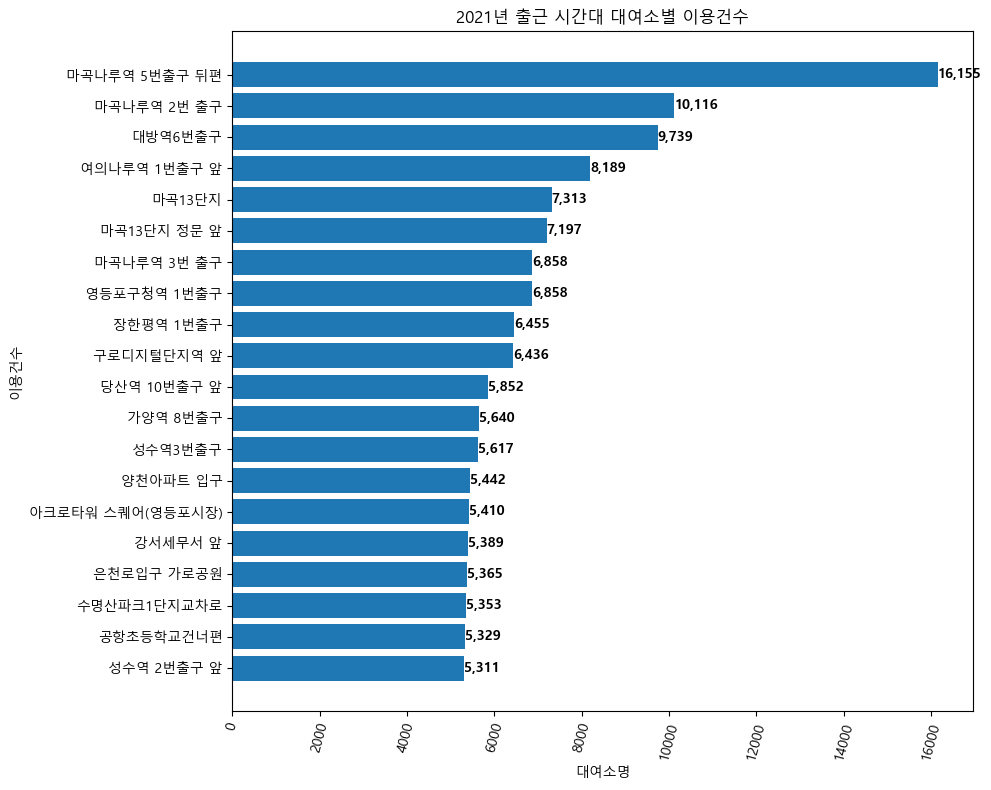

In [66]:
commute_data = group1[group1['출퇴근'] == '출근']

# Creating a bar graph for the '출근' data
import matplotlib.pyplot as plt
top_20_commute_data = commute_data.sort_values(by='이용건수', ascending=False).head(20)
top_20_commute_data = top_20_commute_data.sort_values(by='이용건수', ascending=True)

plt.figure(figsize=(10,8))
bars = plt.barh(top_20_commute_data['대여소명_y'], top_20_commute_data['이용건수'])
plt.title(_year + '년 출근 시간대 대여소별 이용건수')
plt.xlabel('대여소명')
plt.ylabel('이용건수')

# 각 막대 끝에 이용건수 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='left', va='center', fontweight='bold')
    
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()

In [67]:
top_20_m = top_20_commute_data.sort_values(by='이용건수', ascending=False)

In [68]:
top_20_m

,대여소명_y,출퇴근,이용건수
1651,마곡나루역 5번출구 뒤편,출근,16155.0
1647,마곡나루역 2번 출구,출근,10116.0
1183,대방역6번출구,출근,9739.0
3655,여의나루역 1번출구 앞,출근,8189.0
1633,마곡13단지,출근,7313.0
1635,마곡13단지 정문 앞,출근,7197.0
1649,마곡나루역 3번 출구,출근,6858.0
3773,영등포구청역 1번출구,출근,6858.0
4358,장한평역 1번출구,출근,6455.0
701,구로디지털단지역 앞,출근,6436.0


## 출근 시간대 top20 대여소 지도에 나타내기 

In [70]:
import pandas as pd
import numpy as np
import json

import folium

In [71]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

In [72]:
rental = pd.read_parquet(path_dateset + '_파킷 파일/서울시 공공자전거 대여소 정보/공공자전거 대여소 정보_통합본_최종.parquet')
rental = rental.iloc[4:]
rental.reset_index(drop = True, inplace = True)

In [73]:
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN
1,02909,석계역 3번 출구,노원구,서울특별시 노원구 화랑로 351-2 구두수선대196,37.61545944,127.0674515,2020-03-25,NaN,13.0,QR,2024-06,ST-2075,NaN
2,02908,광운대학교 중앙도서관,노원구,서울특별시 노원구 광운로 20 광운대학교,37.62000275,127.0585632,2020-03-24,NaN,20.0,QR,2024-06,ST-2074,NaN
3,02907,월계중학교,노원구,서울특별시 노원구 초안산로 29 신계초등학교,37.63074875,127.0531082,2020-03-24,NaN,15.0,QR,2024-06,ST-2073,NaN
4,02904,중계3차청구아파트,노원구,서울특별시 노원구 중계로 233 청구3차아파트,37.65050507,127.0739822,2020-03-24,NaN,8.0,QR,2024-06,ST-2070,NaN


In [74]:
have_bikes = rental.groupby('자치구').size()

In [75]:
rental = rental.rename(columns={'대여소명':'대여소명_y'})
rental

,대여소번호,대여소명_y,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN
1,02909,석계역 3번 출구,노원구,서울특별시 노원구 화랑로 351-2 구두수선대196,37.61545944,127.0674515,2020-03-25,NaN,13.0,QR,2024-06,ST-2075,NaN
2,02908,광운대학교 중앙도서관,노원구,서울특별시 노원구 광운로 20 광운대학교,37.62000275,127.0585632,2020-03-24,NaN,20.0,QR,2024-06,ST-2074,NaN
3,02907,월계중학교,노원구,서울특별시 노원구 초안산로 29 신계초등학교,37.63074875,127.0531082,2020-03-24,NaN,15.0,QR,2024-06,ST-2073,NaN
4,02904,중계3차청구아파트,노원구,서울특별시 노원구 중계로 233 청구3차아파트,37.65050507,127.0739822,2020-03-24,NaN,8.0,QR,2024-06,ST-2070,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,05884,GS강서타워,영등포구,"GS 홈쇼핑본사(GS강서빌딩), 75, 선유로, 문래동4가, 문래동, 영등포구, 서...",37.52098083,126.88929749,None,NaN,NaN,None,None,ST-3331,8.0
2952,05885,신정교하부(도림천역 방면),영등포구,"도림천로, 문래동5가, 문래동, 영등포구, 서울특별시, 07285, 대한민국",37.51594543,126.88288879,None,NaN,NaN,None,None,ST-3341,10.0
2953,06060,신한은행 본점,중구,"세종대로9길, 서소문동, 소공동, 중구, 서울특별시, 04512, 대한민국",37.56077576,126.97480774,None,NaN,NaN,None,None,ST-3342,8.0
2954,06176,유광사 여성병원 앞,강서구,"유광사여성병원, 194, 강서로, 우장산동, 강서구, 서울특별시, 07698, 대한민국",37.5434494,126.83891296,None,NaN,NaN,None,None,ST-3327,7.0


In [76]:
top_20_m = pd.merge(top_20_m, rental, on='대여소명_y', how='left')
top_20_m

,대여소명_y,출퇴근,이용건수,대여소번호,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,마곡나루역 5번출구 뒤편,출근,16155.0,02701,강서구,강서구 마곡동 761-5,37.56520081,126.8273163,2018-11-14,26.0,NaN,LCD,2024-06,ST-1718,NaN
1,마곡나루역 2번 출구,출근,10116.0,02715,강서구,강서구 마곡중앙5로 6,37.56692505,126.8274384,2020-05-27,NaN,25.0,QR,2024-06,ST-2031,NaN
2,대방역6번출구,출근,9739.0,00259,영등포구,서울특별시 영등포구 신길동1368,37.51359177,126.9259338,2016-06-29,17.0,17.0,QR,2024-06,ST-307,NaN
3,여의나루역 1번출구 앞,출근,8189.0,00207,영등포구,서울특별시 영등포구 여의동로 지하343,37.52715683,126.9319,2015-09-17,46.0,46.0,QR,2024-06,ST-73,NaN
4,마곡13단지,출근,7313.0,01184,강서구,강서구 공항동 1343,37.55644989,126.815979,2018-10-10,26.0,NaN,LCD,2024-06,ST-1645,NaN
5,마곡13단지 정문 앞,출근,7197.0,02733,강서구,강서구 마곡동 730-417,37.5586319,126.8199158,2020-03-20,NaN,15.0,QR,2024-06,ST-2050,NaN
6,마곡나루역 3번 출구,출근,6858.0,02728,강서구,강서구 마곡동 372-23,37.56580353,126.8280792,2020-03-12,NaN,55.0,QR,2024-06,ST-2045,NaN
7,영등포구청역 1번출구,출근,6858.0,00230,영등포구,서울특별시 영등포구 당산로 111-2,37.52463531,126.8962174,2016-07-06,13.0,13.0,QR,2024-06,ST-413,NaN
8,장한평역 1번출구,출근,6455.0,00646,동대문구,서울특별시 동대문구 장한로 3-1 구두수선대,37.56196594,127.0645065,2017-11-28,10.0,NaN,LCD,2023-12,None,NaN
9,구로디지털단지역 앞,출근,6436.0,01911,구로구,서울특별시 구로구 시흥대로 577-2,37.48493958,126.9013214,2017-05-11,18.0,NaN,LCD,2024-06,ST-668,NaN


### 자전거 도로 정보

In [78]:
geo_path = path_dateset + '_최종 병합 파일\\서울시 자전거 도로 데이터\\' + 'ddareng_road.geojson'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str = json.load(f)
# # ============================

### 자치구 정보

In [80]:
geo_path = path_dateset + 'seoul_municipalities_geo_simple.json'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str2 = json.load(f)
# # ============================

### 지하철역통합

In [82]:
filename = '_최종 병합 파일\\서울교통공사 역주소 및 전화번호\\지하철역통합_20241031.parquet'
df_train_station = pd.read_parquet(path_dateset + filename)
df_train_station.head()

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소,station_code,seoulmetro_code,external_code,station_name(kor),lat,lng
0,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,651.0,4703,943,419민주묘지,37.6482352,127.008614
1,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,335.0,1907,109,가능,37.748577,127.044213
2,92.0,340,3.0,가락시장,02-6110-3501,서울특별시 송파구 송파대로 지하257(가락동),서울특별시 송파구 가락동 184-23 가락시장역(3호선),78.0,340,350,가락시장,37.492522,127.118234
3,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,230.0,1702,P142,가산디지털단지,37.481072,126.882343
4,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,580.0,4107,907,가양,37.561391,126.854456


In [83]:
b_출퇴근 = '출근'

if b_출퇴근 == '출근':
    df_출퇴근 = top_20_m
else:
    df_출퇴근 = top_20_e

In [84]:
# 지도 생성
center = [37.541, 126.986]
# center on Liberty Bell, add marker
bike_map = folium.Map(location=center, zoom_start=13)
# 스타일 지정 예시 (선의 색상, 두께 등)
style = {
    'color': 'red',
    'weight': 3,
    'opacity': 0.7,
}

fg0 = folium.FeatureGroup(name="bike_road", show=False).add_to(bike_map)
# 자전거 도로 표시
# GeoJSON 파일을 불러와 스타일 적용
folium.GeoJson(
    geo_str,
    name='bike_road',
    style_function=lambda x: style
).add_to(fg0)

fg1 = folium.FeatureGroup(name="bike_rental", show=False).add_to(bike_map)
# 자전거 대여소 표시
for i, row in top_20_m.iterrows():
  # folium.Marker(
    #folium.CircleMarker(
    folium.Circle(
      location = [row['위도'], row['경도']],
      radius = 100,
      color='black',                  # 외곽선 색상
      fill=False,                     # 채우기 여부
      fill_color='blue',             # 채우기 색상
      fill_opacity=0.6,              # 채우기 불투명도
      #popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
      tooltip=row['대여소명_y'],                 # 마우스 오버 시 표시되는 툴팁
      #icon=folium.Icon(icon = 'bookmark', color = 'blue')
  ).add_to(fg1)

fg2 = folium.FeatureGroup(name="train_station", show=False).add_to(bike_map)
# 지하철역 표시
for i, row in df_train_station.iterrows():
  folium.CircleMarker(
      location = [row['lat'], row['lng']],
      radius=2,                     # 반지름 (픽셀 단위)
      color='yellow',                  # 외곽선 색상
      fill=True,                     # 채우기 여부
      fill_color='yellow',             # 채우기 색상
      fill_opacity=0.6,              # 채우기 불투명도
      popup=row[' seoulmetro_code'],             # 클릭 시 표시되는 팝업
      tooltip=row[' station_name(kor)']                 # 마우스 오버 시 표시되는 툴팁      
  ).add_to(fg2)

# 자치구 구분 표
geo_str2 = json.load(open('G:\\내 드라이브\\DataSet\\seoul_municipalities_geo_simple.json', encoding='utf-8'))
choropleth = folium.Choropleth(geo_data = geo_str2,
                  data = have_bikes,
                  name = 'gu',
                  key_on = 'feature.properties.SIG_KOR_NM',
                  fill_color = 'Blues')
# 1. GeoJsonTooltip을 사용하는 방법:
# folium.GeoJsonTooltip(fields=['SIG_ENG_NM'],
#                       aliases=['지역:'],
#                       style=('background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;')
# ).add_to(choropleth.geojson)
# 2. GeoJsonPopup을 사용하는 방법:
folium.GeoJsonPopup(fields=['SIG_KOR_NM'],
                    aliases=['지역:'],
                    style='font-weight: bold;'
).add_to(choropleth.geojson)
choropleth.add_to(bike_map)

folium.LayerControl().add_to(bike_map)

# jupyter 에서 곧장 지도 표시하기
#bike_map

# web에서 표시하기
# 지도 저장
bike_map.save("folium_bike_" + _year + '_' + b_출퇴근 + ".html")
import webbrowser
webbrowser.open("folium_bike_" + _year + '_' + b_출퇴근 + ".html")

True

- 퇴근 시간대 대여소별 이용건수

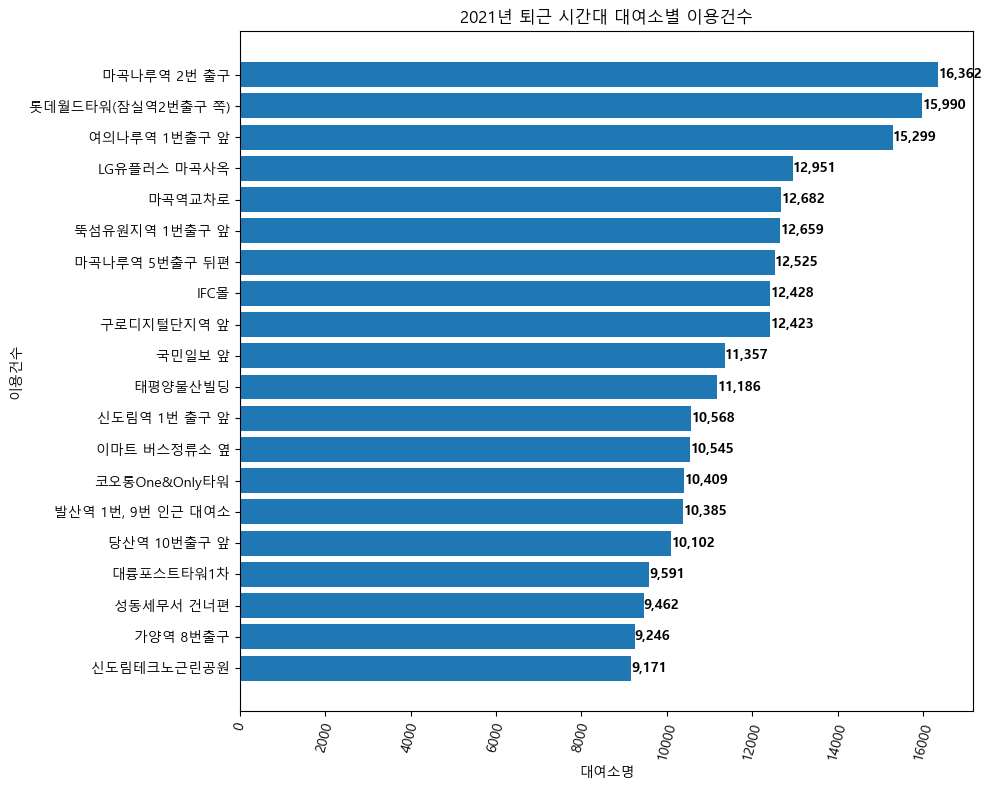

In [86]:
commute_data_2 = group1[group1['출퇴근'] == '퇴근']

# Creating a bar graph for the '출근' data
import matplotlib.pyplot as plt
top_20_commute_data_2 = commute_data_2.sort_values(by='이용건수', ascending=False).head(20)
top_20_commute_data_2 = top_20_commute_data_2.sort_values(by='이용건수', ascending=True)

plt.figure(figsize=(10,8))
bars = plt.barh(top_20_commute_data_2['대여소명_y'], top_20_commute_data_2['이용건수'])
plt.title(_year + '년 퇴근 시간대 대여소별 이용건수')
plt.xlabel('대여소명')
plt.ylabel('이용건수')

# 각 막대 끝에 이용건수 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='left', va='center', fontweight='bold')

plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()

In [87]:
top_20_e = top_20_commute_data_2.sort_values(by='이용건수', ascending=False)
top_20_e

,대여소명_y,출퇴근,이용건수
1648,마곡나루역 2번 출구,퇴근,16362.0
1582,롯데월드타워(잠실역2번출구 쪽),퇴근,15990.0
3656,여의나루역 1번출구 앞,퇴근,15299.0
133,LG유플러스 마곡사옥,퇴근,12951.0
1698,마곡역교차로,퇴근,12682.0
1532,뚝섬유원지역 1번출구 앞,퇴근,12659.0
1652,마곡나루역 5번출구 뒤편,퇴근,12525.0
73,IFC몰,퇴근,12428.0
702,구로디지털단지역 앞,퇴근,12423.0
792,국민일보 앞,퇴근,11357.0


## 퇴근 시간대 top20 대여소 지도에 나타내기 

In [89]:
import pandas as pd
import numpy as np
import json

import folium

In [90]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

In [91]:
rental = pd.read_parquet(path_dateset + '_파킷 파일/서울시 공공자전거 대여소 정보/공공자전거 대여소 정보_통합본_최종.parquet')
rental = rental.iloc[4:]
rental.reset_index(drop = True, inplace = True)

In [92]:
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN
1,02909,석계역 3번 출구,노원구,서울특별시 노원구 화랑로 351-2 구두수선대196,37.61545944,127.0674515,2020-03-25,NaN,13.0,QR,2024-06,ST-2075,NaN
2,02908,광운대학교 중앙도서관,노원구,서울특별시 노원구 광운로 20 광운대학교,37.62000275,127.0585632,2020-03-24,NaN,20.0,QR,2024-06,ST-2074,NaN
3,02907,월계중학교,노원구,서울특별시 노원구 초안산로 29 신계초등학교,37.63074875,127.0531082,2020-03-24,NaN,15.0,QR,2024-06,ST-2073,NaN
4,02904,중계3차청구아파트,노원구,서울특별시 노원구 중계로 233 청구3차아파트,37.65050507,127.0739822,2020-03-24,NaN,8.0,QR,2024-06,ST-2070,NaN


In [93]:
have_bikes = rental.groupby('자치구').size()

In [94]:
rental = rental.rename(columns={'대여소명':'대여소명_y'})
rental

,대여소번호,대여소명_y,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN
1,02909,석계역 3번 출구,노원구,서울특별시 노원구 화랑로 351-2 구두수선대196,37.61545944,127.0674515,2020-03-25,NaN,13.0,QR,2024-06,ST-2075,NaN
2,02908,광운대학교 중앙도서관,노원구,서울특별시 노원구 광운로 20 광운대학교,37.62000275,127.0585632,2020-03-24,NaN,20.0,QR,2024-06,ST-2074,NaN
3,02907,월계중학교,노원구,서울특별시 노원구 초안산로 29 신계초등학교,37.63074875,127.0531082,2020-03-24,NaN,15.0,QR,2024-06,ST-2073,NaN
4,02904,중계3차청구아파트,노원구,서울특별시 노원구 중계로 233 청구3차아파트,37.65050507,127.0739822,2020-03-24,NaN,8.0,QR,2024-06,ST-2070,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,05884,GS강서타워,영등포구,"GS 홈쇼핑본사(GS강서빌딩), 75, 선유로, 문래동4가, 문래동, 영등포구, 서...",37.52098083,126.88929749,None,NaN,NaN,None,None,ST-3331,8.0
2952,05885,신정교하부(도림천역 방면),영등포구,"도림천로, 문래동5가, 문래동, 영등포구, 서울특별시, 07285, 대한민국",37.51594543,126.88288879,None,NaN,NaN,None,None,ST-3341,10.0
2953,06060,신한은행 본점,중구,"세종대로9길, 서소문동, 소공동, 중구, 서울특별시, 04512, 대한민국",37.56077576,126.97480774,None,NaN,NaN,None,None,ST-3342,8.0
2954,06176,유광사 여성병원 앞,강서구,"유광사여성병원, 194, 강서로, 우장산동, 강서구, 서울특별시, 07698, 대한민국",37.5434494,126.83891296,None,NaN,NaN,None,None,ST-3327,7.0


In [95]:
top_20_e = pd.merge(top_20_e, rental, on='대여소명_y', how='left')
top_20_e

,대여소명_y,출퇴근,이용건수,대여소번호,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,마곡나루역 2번 출구,퇴근,16362.0,02715,강서구,강서구 마곡중앙5로 6,37.56692505,126.8274384,2020-05-27,NaN,25.0,QR,2024-06,ST-2031,NaN
1,롯데월드타워(잠실역2번출구 쪽),퇴근,15990.0,01210,송파구,서울특별시 송파구 올림픽로 293-19,37.51312637,127.1009598,2017-06-27,30.0,NaN,LCD,2024-06,ST-891,NaN
2,여의나루역 1번출구 앞,퇴근,15299.0,00207,영등포구,서울특별시 영등포구 여의동로 지하343,37.52715683,126.9319,2015-09-17,46.0,46.0,QR,2024-06,ST-73,NaN
3,LG유플러스 마곡사옥,퇴근,12951.0,02717,강서구,강서구 마곡중앙8로 71,37.56133652,126.8339005,2020-03-15,NaN,62.0,QR,2024-06,ST-2033,NaN
4,마곡역교차로,퇴근,12682.0,01152,강서구,서울특별시 강서구 마곡동 728-168,37.55831146,126.8265228,2017-11-01,10.0,30.0,QR,2024-06,ST-1064,NaN
5,뚝섬유원지역 1번출구 앞,퇴근,12659.0,00502,광진구,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.53186035,127.0671921,2015-10-07,17.0,33.0,QR,2024-06,None,NaN
6,마곡나루역 5번출구 뒤편,퇴근,12525.0,02701,강서구,강서구 마곡동 761-5,37.56520081,126.8273163,2018-11-14,26.0,NaN,LCD,2024-06,ST-1718,NaN
7,IFC몰,퇴근,12428.0,00210,영등포구,서울특별시 영등포구 국제금융로 10,37.52603149,126.9255066,2015-09-17,31.0,NaN,LCD,2021-12,None,NaN
8,구로디지털단지역 앞,퇴근,12423.0,01911,구로구,서울특별시 구로구 시흥대로 577-2,37.48493958,126.9013214,2017-05-11,18.0,NaN,LCD,2024-06,ST-668,NaN
9,국민일보 앞,퇴근,11357.0,00202,영등포구,서울특별시 영등포구 여의공원로 101,37.52881622,126.92453,2015-09-11,30.0,30.0,QR,2024-06,ST-47,NaN


### 자전거도로정보

In [97]:
geo_path = path_dateset + '_최종 병합 파일\\서울시 자전거 도로 데이터\\' + 'ddareng_road.geojson'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str = json.load(f)
# # ============================

### 자치구정보

In [99]:
geo_path = path_dateset + 'seoul_municipalities_geo_simple.json'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str2 = json.load(f)
# # ============================

### 지하철역통합

In [101]:
filename = '_최종 병합 파일\\서울교통공사 역주소 및 전화번호\\지하철역통합_20241031.parquet'
df_train_station = pd.read_parquet(path_dateset + filename)
df_train_station.head()

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소,station_code,seoulmetro_code,external_code,station_name(kor),lat,lng
0,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,651.0,4703,943,419민주묘지,37.6482352,127.008614
1,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,335.0,1907,109,가능,37.748577,127.044213
2,92.0,340,3.0,가락시장,02-6110-3501,서울특별시 송파구 송파대로 지하257(가락동),서울특별시 송파구 가락동 184-23 가락시장역(3호선),78.0,340,350,가락시장,37.492522,127.118234
3,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,230.0,1702,P142,가산디지털단지,37.481072,126.882343
4,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,580.0,4107,907,가양,37.561391,126.854456


In [102]:
b_출퇴근 = '퇴근'

if b_출퇴근 == '출근':
    df_출퇴근 = top_20_m
else:
    df_출퇴근 = top_20_e

In [103]:
# 지도 생성
center = [37.541, 126.986]
# center on Liberty Bell, add marker
bike_map = folium.Map(location=center, zoom_start=13)
# 스타일 지정 예시 (선의 색상, 두께 등)
style = {
    'color': 'red',
    'weight': 3,
    'opacity': 0.7,
}

fg0 = folium.FeatureGroup(name="bike_road", show=False).add_to(bike_map)
# 자전거 도로 표시
# GeoJSON 파일을 불러와 스타일 적용
folium.GeoJson(
    geo_str,
    name='bike_road',
    style_function=lambda x: style
).add_to(fg0)

fg1 = folium.FeatureGroup(name="bike_rental", show=False).add_to(bike_map)
# 자전거 대여소 표시
for i, row in df_출퇴근.iterrows():
  # folium.Marker(
    #folium.CircleMarker(
    folium.Circle(
      location = [row['위도'], row['경도']],
      radius = 100,
      color='black',                  # 외곽선 색상
      fill=False,                     # 채우기 여부
      fill_color='blue',             # 채우기 색상
      fill_opacity=0.6,              # 채우기 불투명도
      #popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
      tooltip=row['대여소명_y'],                 # 마우스 오버 시 표시되는 툴팁
      #icon=folium.Icon(icon = 'bookmark', color = 'blue')
  ).add_to(fg1)

fg2 = folium.FeatureGroup(name="train_station", show=False).add_to(bike_map)
# 지하철역 표시
for i, row in df_train_station.iterrows():
  folium.CircleMarker(
      location = [row['lat'], row['lng']],
      radius=2,                     # 반지름 (픽셀 단위)
      color='yellow',                  # 외곽선 색상
      fill=True,                     # 채우기 여부
      fill_color='yellow',             # 채우기 색상
      fill_opacity=0.6,              # 채우기 불투명도
      popup=row[' seoulmetro_code'],             # 클릭 시 표시되는 팝업
      tooltip=row[' station_name(kor)']                 # 마우스 오버 시 표시되는 툴팁      
  ).add_to(fg2)

# 자치구 구분 표
geo_str2 = json.load(open('G:\\내 드라이브\\DataSet\\seoul_municipalities_geo_simple.json', encoding='utf-8'))
choropleth = folium.Choropleth(geo_data = geo_str2,
                  data = have_bikes,
                  name = 'gu',
                  key_on = 'feature.properties.SIG_KOR_NM',
                  fill_color = 'Blues')
# 1. GeoJsonTooltip을 사용하는 방법:
# folium.GeoJsonTooltip(fields=['SIG_ENG_NM'],
#                       aliases=['지역:'],
#                       style=('background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;')
# ).add_to(choropleth.geojson)
# 2. GeoJsonPopup을 사용하는 방법:
folium.GeoJsonPopup(fields=['SIG_KOR_NM'],
                    aliases=['지역:'],
                    style='font-weight: bold;'
).add_to(choropleth.geojson)
choropleth.add_to(bike_map)

folium.LayerControl().add_to(bike_map)

# jupyter 에서 곧장 지도 표시하기
#bike_map

# web에서 표시하기
# 지도 저장

bike_map.save("folium_bike_" + _year + '_' + b_출퇴근 + ".html")
import webbrowser
webbrowser.open("folium_bike_" + _year + '_' + b_출퇴근 + ".html")

True

-------------------------------------------------